In [28]:
import requests
import json
import pandas as pd
%matplotlib inline

from io import StringIO
from IPython.core.display import HTML

In [15]:
url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/BE/BE0101/BE0101H/FoddaK'
query = {"query": [], "response": {}}

In [16]:
#CREATE NEW FILTER
code = 'Region'
kind = 'item'
values = ['00']
print(query)
new_filter = {"code": code, "selection": {"filter": kind, "values": values}}
try:
    ix = next(i for (i, d) in enumerate(query['query']) if d['code'] == code)
    query['query'][ix] = new_filter
except StopIteration:
    query["query"].append(new_filter)

{'query': [], 'response': {}}


In [17]:
query["response"] = {"format": 'csv'}
print(query)
r = requests.post(url, data=json.dumps(query))

{'query': [{'code': 'Region', 'selection': {'filter': 'item', 'values': ['00']}}], 'response': {'format': 'csv'}}


In [18]:
df = pd.read_csv(StringIO(r.text))

In [19]:
df.T.head()

,0
region,00 Riket
Levande födda 1968,113086
Levande födda 1969,107621
Levande födda 1970,110149
Levande födda 1971,114485


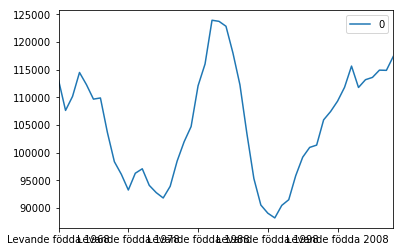

In [29]:
df.T[1:100].plot()

In [20]:
query

{'query': [{'code': 'Region',
   'selection': {'filter': 'item', 'values': ['00']}}],
 'response': {'format': 'csv'}}

In [8]:
url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/HE/HE0110/HE0110A'
#url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/BE/BE0101/BE0101H/FoddaK'

#{"code":"Tid", "selection":{ "filter":"top", "values":["3"]}}],
query = {"query": [], "response": {'format': 'csv'}}
r = requests.post(url, data=json.dumps(query))
df = pd.read_csv(StringIO(r.text))
print(df)

Empty DataFrame
Columns: [[{"id":"SamForvInk1a", type:"t", text:"Sammanräknad förvärvsinkomst för boende i Sverige hela året (antal personer,  medel- och medianinkomst samt totalsumma) efter kön,  inkomstklass och ålder i 1-årsklasser. År 1999 - 2015", updated:"2017-01-31T09:30:00"}, {"id":"SamForvInk1c", type:"t".1, text:"Sammanräknad förvärvsinkomst för boende i Sverige hela året (antal personer.1,  medel- och medianinkomst samt totalsumma) efter region,  utbildningsnivå,  kön och ålder. År 2000 - 2015", updated:"2017-01-31T09:30:00"}.1, {"id":"InkAvTjanst", type:"t".2, text:"Inkomst av tjänst (antal personer,  medelvärden och totalsumma) efter region,  kön,  ålder och inkomstklass. År 2000 - 2015", updated:"2017-01-31T09:30:00"}.2, {"id":"SamForvInk1", type:"t".3, text:"Sammanräknad förvärvsinkomst för boende i Sverige hela året (antal personer.2,  medel- och medianinkomst samt totalsumma) efter region.1,  kön.1,  ålder och inkomstklass. År 1999 - 2015", updated:"2017-01-31T09:30:00

In [9]:
df

,"[{""id"":""SamForvInk1a""","type:""t""","text:""Sammanräknad förvärvsinkomst för boende i Sverige hela året (antal personer",medel- och medianinkomst samt totalsumma) efter kön,"inkomstklass och ålder i 1-årsklasser. År 1999 - 2015""","updated:""2017-01-31T09:30:00""}","{""id"":""SamForvInk1c""","type:""t"".1","text:""Sammanräknad förvärvsinkomst för boende i Sverige hela året (antal personer.1",medel- och medianinkomst samt totalsumma) efter region,...,medel- och medianinkomst samt totalsumma) efter region.3,kön.2,"ålder och inkomstklass. År 1991 - 2015""","updated:""2017-05-09T13:28:00""}","{""id"":""NetInk02""","type:""t"".6","text:""Nettoinkomst för boende i Sverige hela året (antal personer",medel- och medianinkomst samt totalsumma) efter region.4,"kön och ålder. År 2000 - 2015"".1","updated:""2017-06-29T09:30:00""}]"
